In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['flower name'] = df.target.apply(lambda i : iris.target_names[i])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

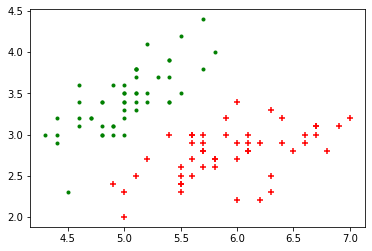

In [ ]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='.')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='+')

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df.drop(['target', 'flower name'], axis = 'columns')

In [ ]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
X = df[['sepal length (cm)', 'sepal width (cm)']]

In [ ]:
y = df.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [ ]:
from sklearn.svr import SVC
model = SVC(kernel = 'rbf', gamma = 'scale')

In [ ]:
model.fit(x_train, y_train)

SVC()

In [ ]:

model.score(x_test, y_test)

0.8

In [ ]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


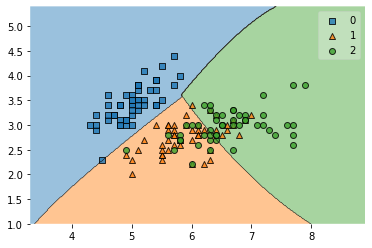

In [ ]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X.values, y=y.values, clf=model)